In [71]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import sys
import os
%matplotlib inline
plt.style.use('seaborn')

In [61]:
# Load Data (see data retrieval notebook)
with open('aggregate_data.p', 'rb') as f:
    data = pickle.load(f)

cats = data['category']
data = data[[x for x in data.columns if x != 'category']].astype(float)
data['category'] = cats

#split into train / test to avoid cheating
np.random.seed(1234)
train_pct = .5
msk = np.random.uniform(0,1,len(data)) < train_pct
train = data.loc[msk, :]
test = data.loc[~msk, :]
avgs = train.groupby('category').mean()

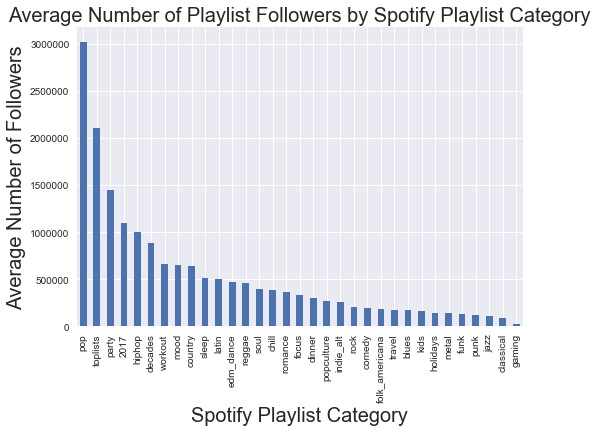

In [62]:
'''
What playlist categories tend to have the most followers?
'''

pd.Series(avgs['num_followers']).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Spotify Playlist Category', fontsize = 20)
plt.ylabel('Average Number of Followers', fontsize = 20)
plt.title('Average Number of Playlist Followers by Spotify Playlist Category', fontsize = 20)

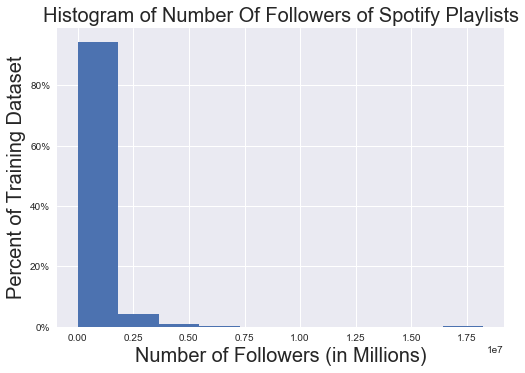

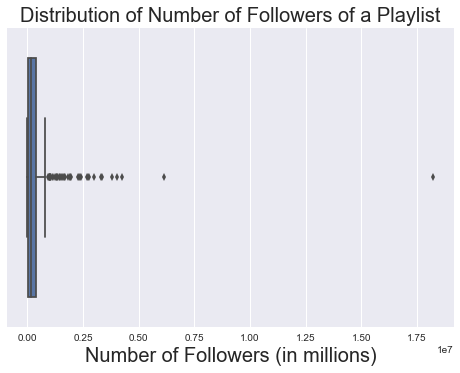

In [77]:
'''
What does the distribution of the number of followers look like?
Note that this is pretty skewed (many more playlists have a small # of followers)
'''

ax = train['num_followers'].hist(weights = np.zeros_like(train['num_followers']) + 1. / train['num_followers'].size)
plt.title('Histogram of Number Of Followers of Spotify Playlists', fontsize = 20)
plt.xlabel('Number of Followers (in Millions)', fontsize = 20)
plt.ylabel('Percent of Training Dataset', fontsize = 20)
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.show()

sns.boxplot(train['num_followers'])
plt.title('Distribution of Number of Followers of a Playlist', fontsize = 20)
plt.xlabel('Number of Followers (in millions)', fontsize = 20)
plt.show()

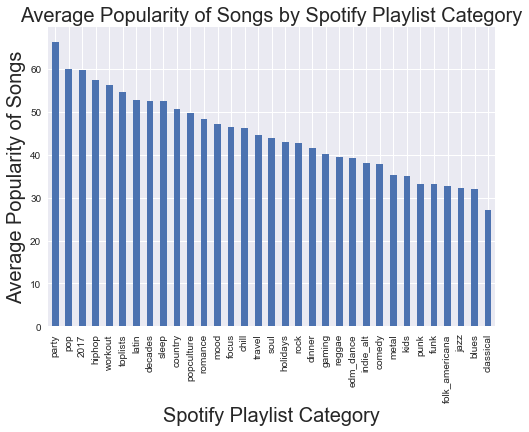

In [69]:
'''
What categories tend to have the most popular songs?

Note that this is slightly different than above; the 'Party' category tends to have the most popular songs
in it. Apparently no one really likes classical music.
'''
avgs['popularity_mean'].sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Spotify Playlist Category', fontsize = 20)
plt.ylabel('Average Popularity of Songs', fontsize = 20)
plt.title('Average Popularity of Songs by Spotify Playlist Category', fontsize = 20)


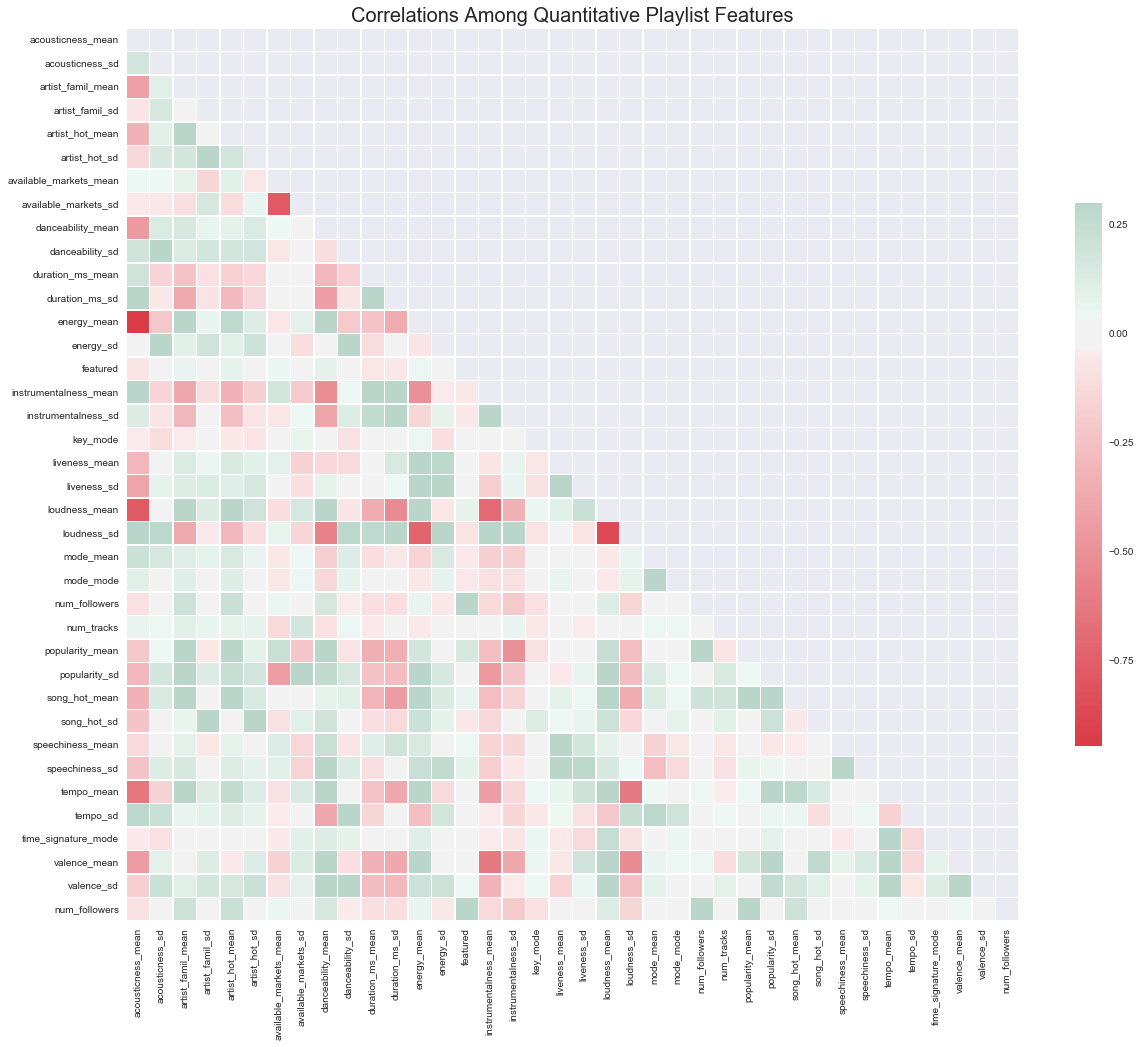

In [130]:
'''
How are our quantitative variables correlated?

Note that the features that tend to be most correlated with number of followers generally make sense;
they are popularity, artist and song 'hotttnesss,' artist familiarity, and whether or not the playlist is featured.

'''
quant_vars = np.sort([x for x in data.columns if x not in ['category','num_follower']])
# remove some variables for readability
quant_vars = [x for x in quant_vars if '_median' not in x]
quant_vars = [x for x in quant_vars if '_min' not in x]
quant_vars = [x for x in quant_vars if '_max' not in x]

corr = data[ quant_vars  + ['num_followers']].astype(float).corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations Among Quantitative Playlist Features', fontsize = 20)
plt.show()

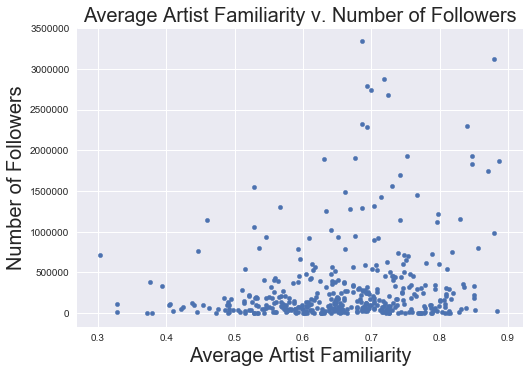

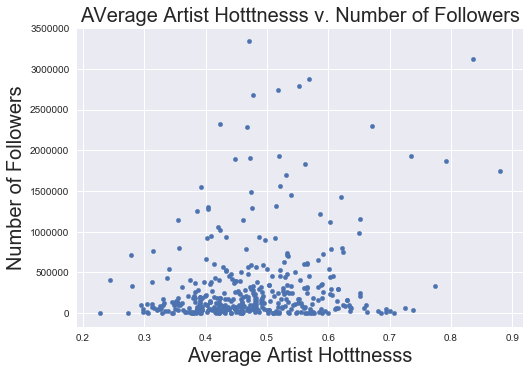

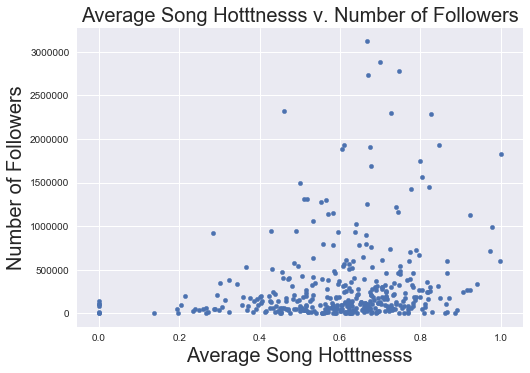

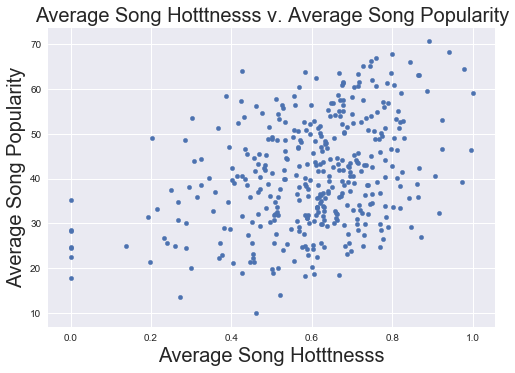

In [131]:
# EDA of MSD Data -- these generally go in the correct direction + make sense given correlation data

data.plot('artist_famil_mean', 'num_followers' ,kind = 'scatter')
plt.xlabel('Average Artist Familiarity', fontsize = 20)
plt.ylabel('Number of Followers', fontsize = 20)
plt.title('Average Artist Familiarity v. Number of Followers', fontsize = 20)
plt.show()

data.plot('artist_hot_mean', 'num_followers' ,kind = 'scatter')
plt.xlabel('Average Artist Hotttnesss', fontsize = 20)
plt.ylabel('Number of Followers', fontsize = 20)
plt.title('AVerage Artist Hotttnesss v. Number of Followers', fontsize = 20)
plt.show()

data.plot('song_hot_mean', 'num_followers' ,kind = 'scatter')
plt.xlabel('Average Song Hotttnesss', fontsize = 20)
plt.ylabel('Number of Followers', fontsize = 20)
plt.title('Average Song Hotttnesss v. Number of Followers', fontsize = 20)
plt.show()

# Also look at song popularity -- how close is this to 'hotttnesss'?
# These are positively correlated, which makes sense, but not perfectly so; there is colinearity
# but they are not the same metric (so both could theoretically have predictive power)
data.plot('song_hot_mean', 'popularity_mean' ,kind = 'scatter')
plt.xlabel('Average Song Hotttnesss', fontsize = 20)
plt.ylabel('Average Song Popularity', fontsize = 20)
plt.title('Average Song Hotttnesss v. Average Song Popularity', fontsize = 20)
plt.show()